In [3]:
import pandas as pd

In [4]:
# Load the two oil_pricessets
oil_prices = pd.read_csv('../Data/BrentOilPrices.csv', parse_dates=['Date'])
events = pd.read_csv('../Data/events.csv', parse_dates=['start_date', 'end_date'])


C:\Users\marta\AppData\Local\Temp\ipykernel_10784\3553282545.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_prices = pd.read_csv('../Data/BrentOilPrices.csv', parse_dates=['Date'])


In [5]:

# Initialize 'event' and 'event_type' with default values
oil_prices['event'] = 'No_event'
oil_prices['event_type'] = 'No_event_type'


In [6]:

# Iterate over each event interval and update the 'oil_prices' oil_prices within those intervals
for idx, row in events.iterrows():
    mask = (oil_prices['Date'] >= row['start_date']) & (oil_prices['Date'] <= row['end_date'])
    oil_prices.loc[mask, 'event'] = row['event']
    oil_prices.loc[mask, 'event_type'] = row['event_type']

In [7]:
oil_prices

,Date,Price,event,event_type
0,1987-05-20,18.63,Brent crude oil first traded on ICE,Economic
1,1987-05-21,18.45,Brent crude oil first traded on ICE,Economic
2,1987-05-22,18.55,Brent crude oil first traded on ICE,Economic
3,1987-05-25,18.60,Brent crude oil first traded on ICE,Economic
4,1987-05-26,18.63,Brent crude oil first traded on ICE,Economic
...,...,...,...,...
9006,2022-11-08,96.85,No_event,No_event_type
9007,2022-11-09,93.05,No_event,No_event_type
9008,2022-11-10,94.25,No_event,No_event_type
9009,2022-11-11,96.37,No_event,No_event_type


In [8]:
# Save the resulting oil_pricesFrame to a new CSV file
oil_prices.to_csv('../Data/merged_oil_price_history.csv', index=False)

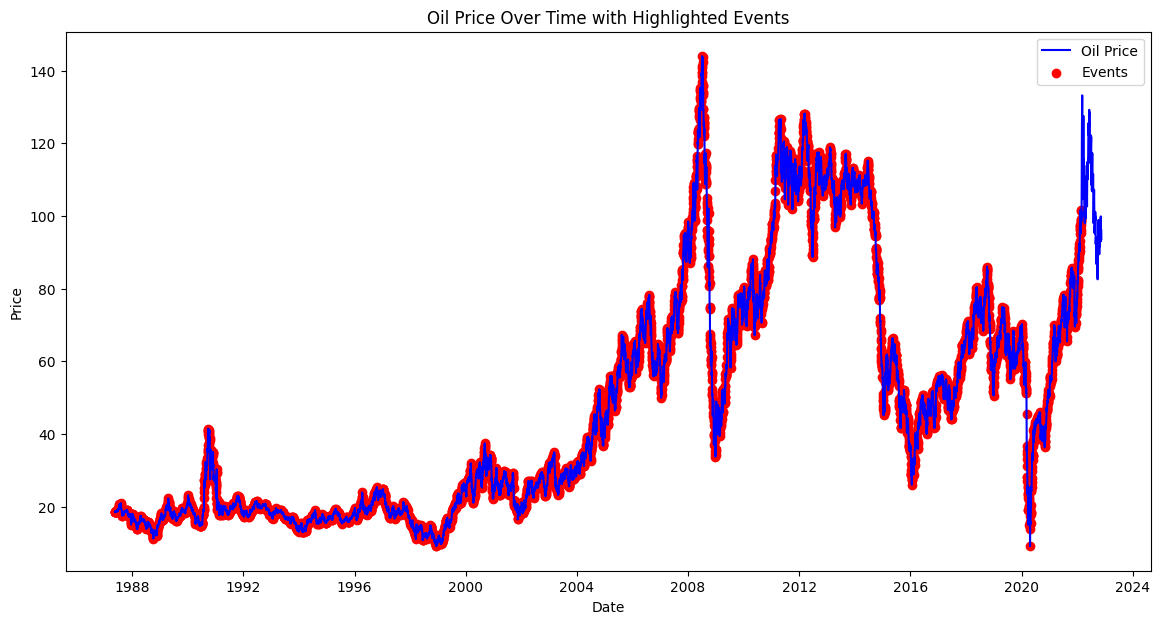

In [9]:
import matplotlib.pyplot as plt

# Example Plot
plt.figure(figsize=(14, 7))
plt.plot(oil_prices['Date'], oil_prices['Price'], label="Oil Price", color='blue')

# Highlight events
event_dates = oil_prices[oil_prices['event'] != 'No_event']['Date']
event_prices = oil_prices[oil_prices['event'] != 'No_event']['Price']
plt.scatter(event_dates, event_prices, color='red', label="Events", marker='o')

plt.title("Oil Price Over Time with Highlighted Events")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#####  Oil Price Volatility Analysis by Event Type

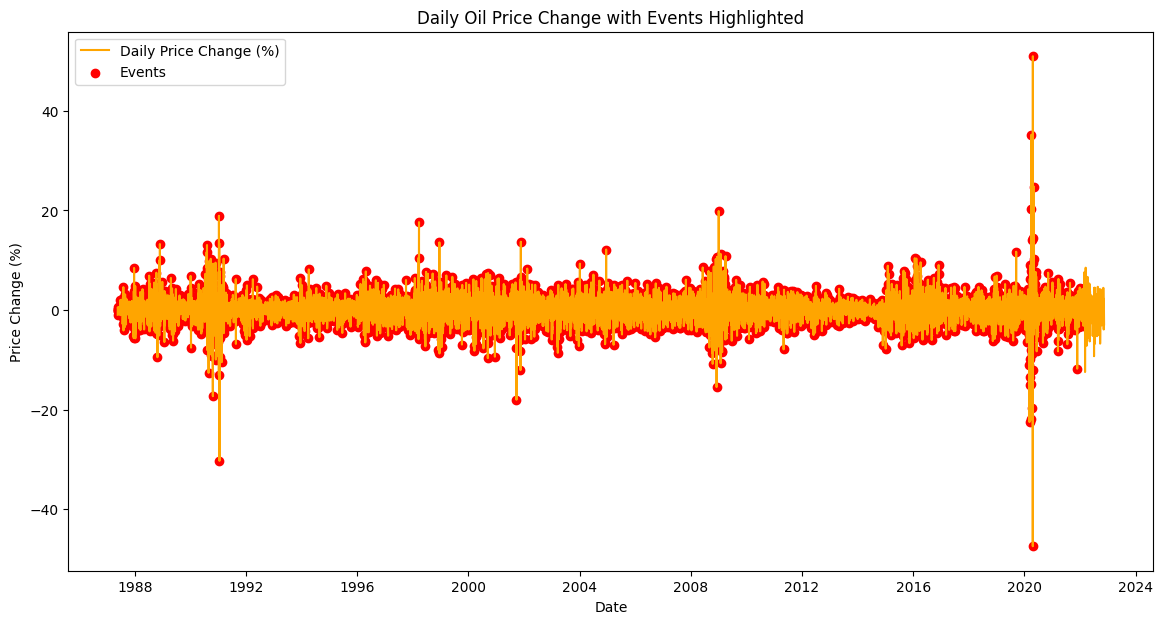

In [10]:
oil_prices['Price Change (%)'] = oil_prices['Price'].pct_change() * 100
plt.figure(figsize=(14, 7))
plt.plot(oil_prices['Date'], oil_prices['Price Change (%)'], label="Daily Price Change (%)", color='orange')

# Highlight events
plt.scatter(event_dates, oil_prices.loc[oil_prices['event'] != 'No_event', 'Price Change (%)'], color='red', label="Events", marker='o')
plt.title("Daily Oil Price Change with Events Highlighted")
plt.xlabel("Date")
plt.ylabel("Price Change (%)")
plt.legend()
plt.show()

In [11]:
oil_prices

,Date,Price,event,event_type,Price Change (%)
0,1987-05-20,18.63,Brent crude oil first traded on ICE,Economic,NaN
1,1987-05-21,18.45,Brent crude oil first traded on ICE,Economic,-0.966184
2,1987-05-22,18.55,Brent crude oil first traded on ICE,Economic,0.542005
3,1987-05-25,18.60,Brent crude oil first traded on ICE,Economic,0.269542
4,1987-05-26,18.63,Brent crude oil first traded on ICE,Economic,0.161290
...,...,...,...,...,...
9006,2022-11-08,96.85,No_event,No_event_type,-3.023931
9007,2022-11-09,93.05,No_event,No_event_type,-3.923593
9008,2022-11-10,94.25,No_event,No_event_type,1.289629
9009,2022-11-11,96.37,No_event,No_event_type,2.249337


#### Event Impact on Moving Average of Oil Price

d:\10 A KAI 2\week 9\Oile_Price_Analysis\my_venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


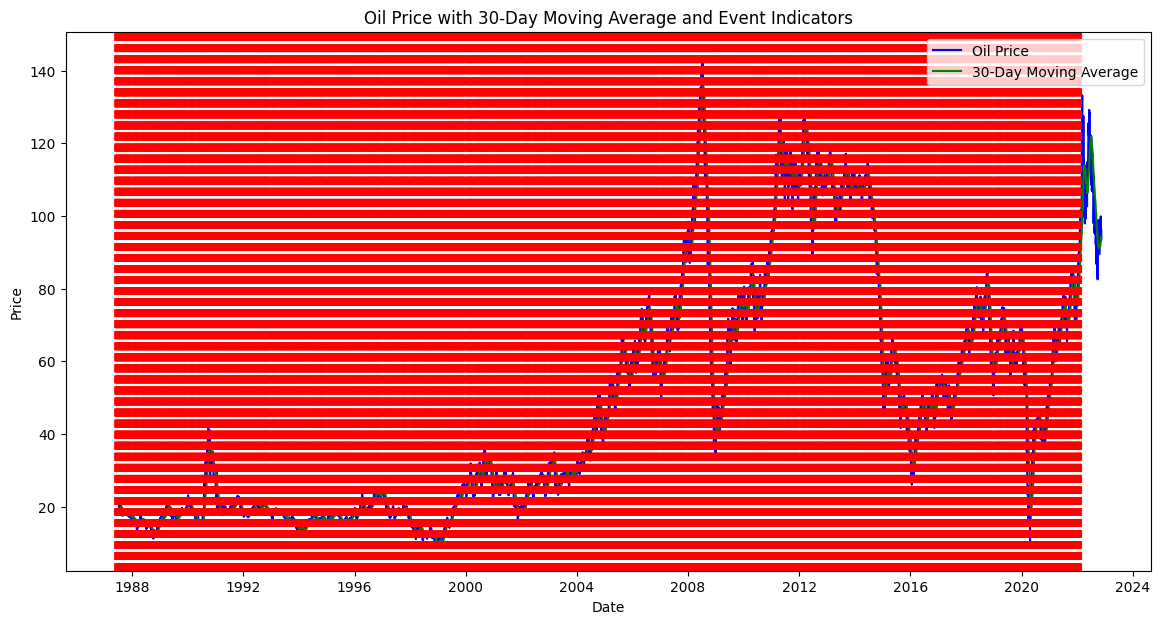

In [12]:
oil_prices['30-Day MA'] = oil_prices['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(oil_prices['Date'], oil_prices['Price'], label="Oil Price", color='blue')
plt.plot(oil_prices['Date'], oil_prices['30-Day MA'], label="30-Day Moving Average", color='green')

# Highlight events with vertical lines
for event_date in event_dates:
    plt.axvline(x=event_date, color='red', linestyle='--', alpha=0.3)

plt.title("Oil Price with 30-Day Moving Average and Event Indicators")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Event Frequency Over Time

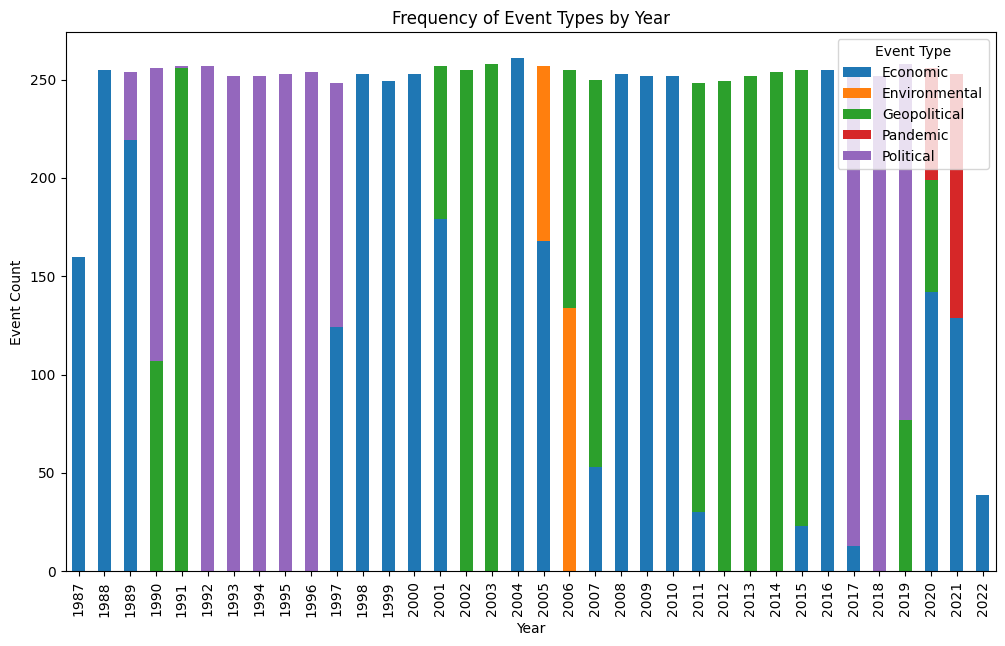

In [13]:
event_counts = oil_prices[oil_prices['event'] != 'No_event'].groupby(['event_type', oil_prices['Date'].dt.year]).size().unstack()

event_counts.T.plot(kind="bar", stacked=True, figsize=(12, 7))
plt.title("Frequency of Event Types by Year")
plt.xlabel("Year")
plt.ylabel("Event Count")
plt.legend(title="Event Type")
plt.show()


plot showing the count of each event_type, you can group the oil_prices by event_type

C:\Users\marta\AppData\Local\Temp\ipykernel_10784\363183943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='event_type', y='count', data=event_counts, palette='viridis')


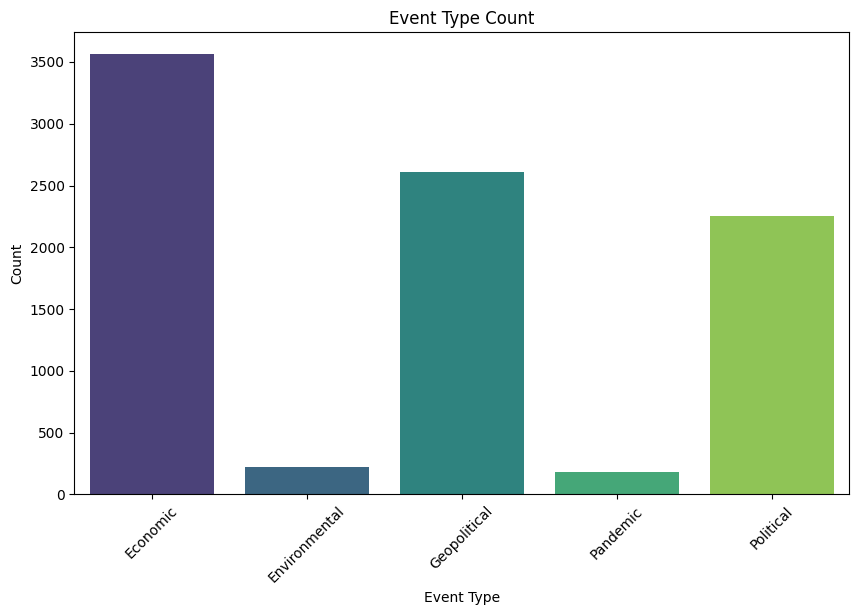

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by `event_type` and count occurrences
event_counts = oil_prices[oil_prices['event_type'] != 'No_event_type'].groupby('event_type').size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='event_type', y='count', data=event_counts, palette='viridis')
plt.title("Event Type Count")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
